In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

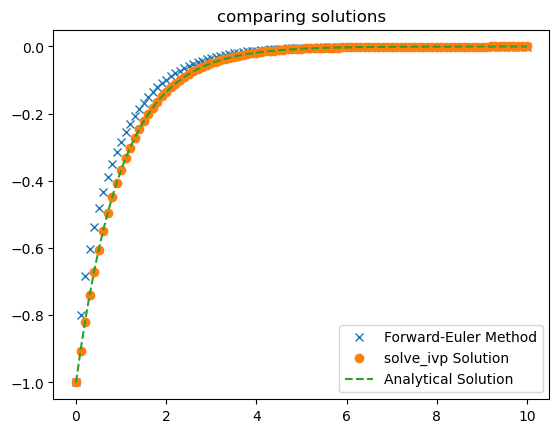

RMSE with Eulers: 0.041346080971567896
RMSE with IVP: 0.0002962227388283007


In [6]:
x0, xf = 0, 10

x_step = 101
step_size = (xf-x0)/(x_step-1)

x = np.linspace(x0, xf, x_step)
y_eul = np.zeros(x_step)

y_eul[0] = -1

for i in range(x_step-1):
    y_eul[i+1] = y_eul[i] + step_size*(-y_eul[i]+np.exp(-i))

plt.plot(x, y_eul, "x")


y0 = [-1]
def fun(x,y):
    return np.exp(-x)

sol = solve_ivp(fun, [x0, xf], y0, t_eval=x)

plt.plot(x, sol.y[0], "o")

y_analytic = -np.exp(-x)
plt.plot(x, y_analytic, "--")

plt.legend(["Forward-Euler Method", "solve_ivp Solution", "Analytical Solution"])
plt.title("comparing solutions")
plt.show()

rmse_eul = np.sqrt(np.mean((y_analytic-y_eul) ** 2))
rmse_ivp = np.sqrt(np.mean((y_analytic-sol.y[0]) ** 2))

print(f"RMSE with Eulers: {rmse_eul}")
print(f"RMSE with IVP: {rmse_ivp}")
